# Plotting invasion threshold for various b/c ratio

The threshold value for social invasion is given by solving the following equation (eq. 1) for $z$:

\begin{equation}
  0= b z h(z) + b\sum_{n \geq 2}{\frac{1}{n}g(n,z,z)} - c
\end{equation}

For differential attachment $h(z) = 0.5$ (eq. 6).

\begin{equation}
  \frac{c}{b} = \frac{1}{2} z + \sum_{n \geq 2}{\frac{1}{n}g(n,z,z)} 
\end{equation}

Moreover the second term is given by (eq. 20): 

\begin{equation}
  \sum_{n=2}^T{\frac{1}{n} g(n,z,z)} = \frac{Tz-1+(1-z)^T}{z (T-1)T}
\end{equation}

which tends to $0$ when $T\longrightarrow +\infty$.

Hence:

\begin{equation}
  \frac{b}{c} =  z + 2 \frac{Tz-1+(1-z)^T}{z (T-1)T}
\end{equation}

Populating the interactive namespace from numpy and matplotlib


(0, 50)

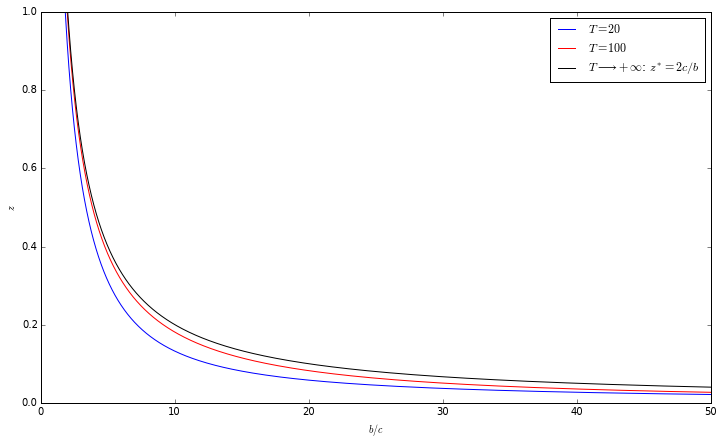

In [7]:
%pylab inline
plt.figure(figsize=(12,7))

def bc(Z,T):
    """ Return the benefit-to-cost ratio threshold for an invasion by more social mutants
    in an infinite population periodically segemented in T-sized patches
        
    Arguments:
        Z (float in [0,1] or infinite): Resident social trait value. 
        T (integer): Patch size.
    """
    if T == np.inf:
        return 2.0/Z
    else:
        return 2.0/( 2*((T*Z - 1 + (1-Z)**T) / (Z*(T-1)*T) ) + Z)

z = np.arange(0.001,1.001,0.001)
theo = 2.0/z

plt.plot(bc(z,20),z, color="b",label="$T = 20$")
plt.plot(bc(z,100),z, color="r",label="$T = 100$")
plt.plot(bc(z,np.inf),z, color="k",label="$T \longrightarrow + \infty $: $z^* = 2c/b$")

plt.legend()
plt.ylabel("$z$")
plt.xlabel("$b/c$")
plt.ylim((0,1))
plt.xlim((0,50))